In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("titanic-cleaned-alldata.csv")

In [3]:
titanic

,PassengerId,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Actual_Fare
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,5360.436931
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,3843.966247
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,3843.966247
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,3843.966247
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,3843.966247
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1302,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C,183.257381
1042,1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,366.621293
1043,1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,183.257381
1044,1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,183.257381


# Survivor rate:

In [61]:
labels_survived = ["Not Survived", "Survived"]
values_survived = titanic["Survived"].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels_survived, values=values_survived)])

colors = ['MediumSeaGreen ', "LightSeaGreen "]
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=17,
                  marker=dict(colors=colors))

fig.update_layout(
    title={
        "text": "Survived vs Not Survived",
        "y":0.88,
        "x":0.465,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20})

fig.show()

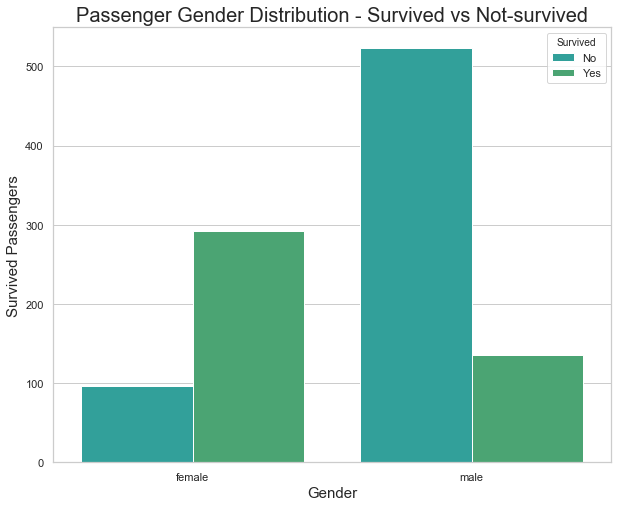

In [64]:
colors = {1:"MediumSeaGreen", 0:"LightSeaGreen"}
sns.set(style="whitegrid")
plt.subplots(figsize = (10,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = titanic, 
                   palette = colors
)

plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
plt.xlabel("Gender", fontsize = 15);
plt.ylabel("Survived Passengers", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

## Survivors by Gender:

In [30]:
labels_sex = ["Female", "Male"]
values_sex = titanic["Sex"].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels_sex, values=values_sex)])

colors = ['MediumSeaGreen ', "LightSeaGreen "]
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors), title_text="Survivors by Gender", titlefont_size=20)

fig.show()

# Survivors by Age:

### Creating the bins and adding them as column:

In [73]:
titanic["Age_Binned"] = pd.cut(x=titanic['Age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
                               labels=["0-5", "5-10","10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45",
                                      "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75-80"])

In [118]:
titanic["Age_Binned"] = pd.cut(x=titanic['Age'], bins=[0, 15, 30, 45, 60, 80],
                               labels=["0-15", "15-30", "30-45",
                                      "45-60", "60-80"])

In [112]:
titanic["Age_Binned"] = pd.cut(x=titanic['Age'], bins=[0, 20, 40, 60, 80],
                               labels=["0-20", "20-40", "40-60", "60-80"])

### Checking the added column:

### Group by the newly created age bins to find out survivor numbers per age range:

In [119]:
binned_age = titanic.groupby("Age_Binned").sum()
binned_age

,PassengerId,Pclass,Survived,Age,Sibsp,Parch,Fare,Actual_Fare
Age_Binned,,,,,,,,
0-15,89527,301,66,757.6667,190,147,3870.9542,98184.211747
15-30,329202,1192,182,11554.5000,174,117,13521.5714,342965.780762
30-45,154700,587,117,10476.0000,99,122,11999.5939,304361.820752
45-60,41259,178,54,6309.5000,53,42,7363.2485,186763.963746
60-80,13138,51,8,2158.0000,10,12,1927.9459,48901.081930


In [120]:
binned_age["Age_quantity"] = titanic.Age_Binned.value_counts().sort_index()

In [121]:
binned_age["age_percentage"] = binned_age["Survived"] / binned_age["Age_quantity"]
binned_age

,PassengerId,Pclass,Survived,Age,Sibsp,Parch,Fare,Actual_Fare,Age_quantity,age_percentage
Age_Binned,,,,,,,,,,
0-15,89527,301,66,757.6667,190,147,3870.9542,98184.211747,115,0.573913
15-30,329202,1192,182,11554.5000,174,117,13521.5714,342965.780762,494,0.368421
30-45,154700,587,117,10476.0000,99,122,11999.5939,304361.820752,282,0.414894
45-60,41259,178,54,6309.5000,53,42,7363.2485,186763.963746,122,0.442623
60-80,13138,51,8,2158.0000,10,12,1927.9459,48901.081930,33,0.242424


In [122]:
binned_age.reset_index(inplace=True)

In [123]:
fig = px.bar(binned_age, x="Age_Binned", y="age_percentage")

fig.update_layout(
    title={
        "text": "Survivors by Age",
        "y":0.95,
        "x":0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20})

fig.show()

### Creating lists with age and survival values:

In [89]:
list_age_bins = list(binned_age.index)
list_survived = list(binned_age.Survived)
age_bins = list(titanic.Age_Binned.value_counts().sort_index())
age_bins

[56, 30, 29, 133, 195, 166, 115, 95, 72, 60, 36, 26, 23, 4, 4, 2]

### Survivors by age bar chart:

In [124]:
fig = px.bar(binned_age, x="Age_Binned", y="Survived")

fig.update_layout(
    title={
        "text": "Survivors by Age",
        "y":0.95,
        "x":0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20})

fig.show()

### youngest, oldest people on the ship

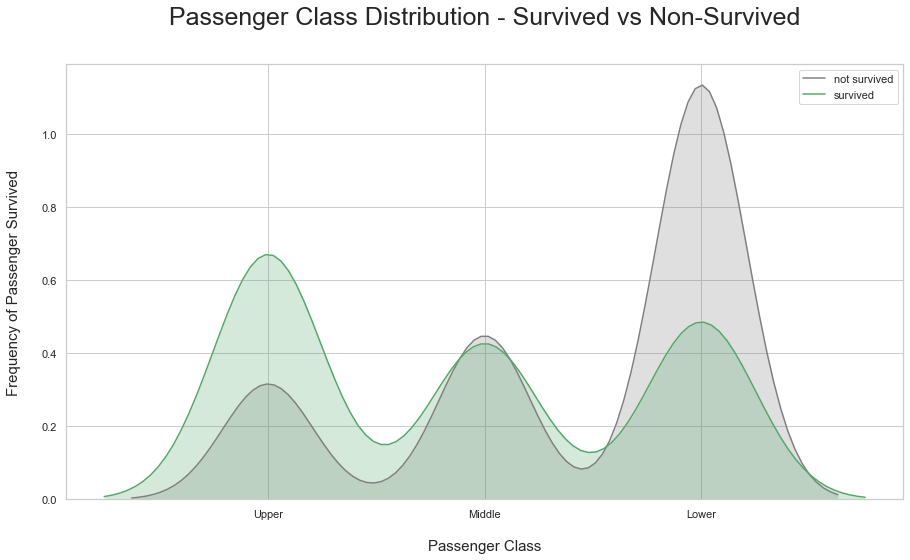

In [128]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(titanic.Pclass[titanic.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(titanic.Pclass.unique()), labels);

### Split the population into two: survived and not survived. only having the info of fare amounts:

In [ ]:
titanic

In [ ]:
titanic.query("Survived == 0")

In [ ]:
survived = titanic.query("Survived == 1")
survived

In [ ]:
survived_fares = survived[["Fare"]]
survived_fares

In [ ]:
died = titanic.query("Survived == 0")
died

In [ ]:
died_fare = list(died["Fare"])
died_fare

In [ ]:
a = np.histogram(died_fare, bins=[100,200,300])
plt.hist(a)

In [ ]:
a = px.data.survived()
fig = px.histogram(a, x="total_bill")
fig.show()